## Final Project Submission

Please fill out:
* Student name: Phillip Ojo
* Student pace: Part time 
* Scheduled project review date/time: August 18th 4:30pm
* Instructor name: James Irving
* Blog post URL: https://phillipojo24.github.io/linear_regression_model



## Introduction

### Problem Statement

We have been tasked with investigating the sale price of houses in the King County area and build a multivariable linear regression model to predict sale prices.

Throughout this exploration we will answer the following questions.

* Does the number of bedrooms have a high impact on sale price?

Understanding what number of bedrooms affect the price. 

* Does the diffrence in Zipcode affect sale price?

If you live in a certain zipcode how much is your sale price affected.

* Which features have a high impact on sales price?

If you are a homeowner and you want to increase your sale price, what features should you focus on.


## Data

A dataset has been provided and can be found in the kc_house_data.csv file in this repository.


The column names and descriptions as provided can be found in the column_names.md file in this repository. For convenience they have been reproduced below.

###Column Names and descriptions for Kings County Data Set

* id - unique identified for a house
* dateDate - house was sold
* pricePrice - is prediction target
* bedroomsNumber - of Bedrooms/House
* bathroomsNumber - of bathrooms/bedrooms
* sqft_livingsquare - footage of the home
* sqft_lotsquare - footage of the lot
* floorsTotal - floors (levels) in house
* waterfront - House which has a view to a waterfront
* view - Has been viewed
* condition - How good the condition is ( Overall )
* grade - overall grade given to the housing unit, based on King County grading system
* sqft_above - square footage of house apart from basement
* sqft_basement - square footage of the basement
* yr_built - Built Year
* yr_renovated - Year when house was renovated
* zipcode - zip
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Obtain Da

In [1]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

df = pd.read_csv('kc_house_data.csv')
df.drop(columns = 'id', inplace = True)
df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      10/13/2014  221900.0         3       1.00         1180      5650   
1       12/9/2014  538000.0         3       2.25         2570      7242   
2       2/25/2015  180000.0         2       1.00          770     10000   
3       12/9/2014  604000.0         4       3.00         1960      5000   
4       2/18/2015  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21592   5/21/2014  360000.0         3       2.50         1530      1131   
21593   2/23/2015  400000.0         4       2.50         2310      5813   
21594   6/23/2014  402101.0         2       0.75         1020      1350   
21595   1/16/2015  400000.0         3       2.50         1600      2388   
21596  10/15/2014  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
0         1.0         NaN   0.0          3      7        1180           0.0   
1         2.0         0.0   0.0          3      7        2170         400.0   
2         1.0         0.0   0.0          3      6         770           0.0   
3         1.0         0.0   0.0          5      7        1050         910.0   
4         1.0         0.0   0.0          3      8        1680           0.0   
...       ...         ...   ...        ...    ...         ...           ...   
21592     3.0         0.0   0.0          3      8        1530           0.0   
21593     2.0         0.0   0.0          3      8        2310           0.0   
21594     2.0         0.0   0.0          3      7        1020           0.0   
21595     2.0         NaN   0.0          3      8        1600           0.0   
21596     2.0         0.0   0.0          3      7        1020           0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955           0.0    98178  47.5112 -122.257           1340   
1          1951        1991.0    98125  47.7210 -122.319           1690   
2          1933           NaN    98028  47.7379 -122.233           2720   
3          1965           0.0    98136  47.5208 -122.393           1360   
4          1987           0.0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009           0.0    98103  47.6993 -122.346           1530   
21593      2014           0.0    98146  47.5107 -122.362           1830   
21594      2009           0.0    98144  47.5944 -122.299           1020   
21595      2004           0.0    98027  47.5345 -122.069           1410   
21596      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[21597 rows x 20 columns]

In [2]:
#GETTING DATA INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


In [3]:
#GETTING DATA BASIC STATS
df.describe()

price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  19221.000000  21534.000000  21597.000000  21597.000000   
mean       1.494096      0.007596      0.233863      3.409825      7.657915   
std        0.539683      0.086825      0.765686      0.650546      1.173200   
min        1.000000      0.000000      0.000000      1.000000      3.000000   
25%        1.000000      0.000000      0.000000      3.000000      7.000000   
50%        1.500000      0.000000      0.000000      3.000000      7.000000   
75%        2.000000      0.000000      0.000000      4.000000      8.000000   
max        3.500000      1.000000      4.000000      5.000000     13.000000   

         sqft_above      yr_built  yr_renovated       zipcode           lat  \
count  21597.000000  21597.000000  17755.000000  21597.000000  21597.000000   
mean    1788.596842   1970.999676     83.636778  98077.951845     47.560093   
std      827.759761     29.375234    399.946414     53.513072      0.138552   
min      370.000000   1900.000000      0.000000  98001.000000     47.155900   
25%     1190.000000   1951.000000      0.000000  98033.000000     47.471100   
50%     1560.000000   1975.000000      0.000000  98065.000000     47.571800   
75%     2210.000000   1997.000000      0.000000  98118.000000     47.678000   
max     9410.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21597.000000   21597.000000   21597.000000  
mean    -122.213982    1986.620318   12758.283512  
std        0.140724     685.230472   27274.441950  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.231000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

In [4]:
#LOOKING AT NULL VALUES
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### SCRUB (DATA CLEANING)

In [5]:
#WANT TO FILL ALL NULL VALUES IN WATERFRONT WITH DISTRIBUTION OF 146:19075
s = df.waterfront.value_counts(normalize = True)
print(s)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64


In [6]:
waterfront_null = df.waterfront.isnull()
df.loc[waterfront_null,'waterfront'] = np.random.choice(s.index,size=len(df[waterfront_null]),p=s.values)
print(df.waterfront.value_counts())

0.0    21439
1.0      158
Name: waterfront, dtype: int64


In [7]:
#CONVERTING DATE FROM OBJECT TO DATE
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [8]:
#REPLACE ? WITH 0 IN SQFT_BASEMENT
df.sqft_basement.replace('?',0,inplace = True)

In [9]:
#REPLACING ALL NULL VALUES IN YR_RENOVATED TO 0 BECAUSE MAJORITY IS 0
for index, col in enumerate(df.yr_renovated.isnull()):
    if col == True:
        df.yr_renovated[index] = 0
df


date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21592 2014-05-21  360000.0         3       2.50         1530      1131   
21593 2015-02-23  400000.0         4       2.50         2310      5813   
21594 2014-06-23  402101.0         2       0.75         1020      1350   
21595 2015-01-16  400000.0         3       2.50         1600      2388   
21596 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above sqft_basement  \
0         1.0         0.0   0.0          3      7        1180           0.0   
1         2.0         0.0   0.0          3      7        2170         400.0   
2         1.0         0.0   0.0          3      6         770           0.0   
3         1.0         0.0   0.0          5      7        1050         910.0   
4         1.0         0.0   0.0          3      8        1680           0.0   
...       ...         ...   ...        ...    ...         ...           ...   
21592     3.0         0.0   0.0          3      8        1530           0.0   
21593     2.0         0.0   0.0          3      8        2310           0.0   
21594     2.0         0.0   0.0          3      7        1020           0.0   
21595     2.0         0.0   0.0          3      8        1600           0.0   
21596     2.0         0.0   0.0          3      7        1020           0.0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955           0.0    98178  47.5112 -122.257           1340   
1          1951        1991.0    98125  47.7210 -122.319           1690   
2          1933           0.0    98028  47.7379 -122.233           2720   
3          1965           0.0    98136  47.5208 -122.393           1360   
4          1987           0.0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009           0.0    98103  47.6993 -122.346           1530   
21593      2014           0.0    98146  47.5107 -122.362           1830   
21594      2009           0.0    98144  47.5944 -122.299           1020   
21595      2004           0.0    98027  47.5345 -122.069           1410   
21596      2008           0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21592        1509  
21593        7200  
21594        2007  
21595        1287  
21596        1357  

[21597 rows x 20 columns]

In [10]:
#TURNING VALUES FROM FLOAT TO INT
float_list = ['sqft_basement','waterfront','yr_renovated']
for col in float_list:
    df[col] = pd.to_numeric(df[col]).astype(int).round(0)

In [11]:
#ZIPCODE TO SUB_REGION DF
subregion_df = pd.read_excel('SubRegZipCityNeighborhood.xlsx')
subregion_df.columns= ['zipcode', 'Sub_Region']
subregion_df

zipcode   Sub_Region
0      98001  South Urban
1      98002  South Urban
2      98003  South Urban
3      98004   East Urban
4      98005   East Urban
..       ...          ...
115    98199      Seattle
116    98224   East Rural
117    98251   East Rural
118    98288   East Rural
119    98354  South Urban

[120 rows x 2 columns]

In [12]:
df = df.join(subregion_df.set_index('zipcode'),on = 'zipcode')
df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21592 2014-05-21  360000.0         3       2.50         1530      1131   
21593 2015-02-23  400000.0         4       2.50         2310      5813   
21594 2014-06-23  402101.0         2       0.75         1020      1350   
21595 2015-01-16  400000.0         3       2.50         1600      2388   
21596 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_above  sqft_basement  \
0         1.0           0   0.0          3  ...        1180              0   
1         2.0           0   0.0          3  ...        2170            400   
2         1.0           0   0.0          3  ...         770              0   
3         1.0           0   0.0          5  ...        1050            910   
4         1.0           0   0.0          3  ...        1680              0   
...       ...         ...   ...        ...  ...         ...            ...   
21592     3.0           0   0.0          3  ...        1530              0   
21593     2.0           0   0.0          3  ...        2310              0   
21594     2.0           0   0.0          3  ...        1020              0   
21595     2.0           0   0.0          3  ...        1600              0   
21596     2.0           0   0.0          3  ...        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21592      2009             0    98103  47.6993 -122.346           1530   
21593      2014             0    98146  47.5107 -122.362           1830   
21594      2009             0    98144  47.5944 -122.299           1020   
21595      2004             0    98027  47.5345 -122.069           1410   
21596      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15         Sub_Region  
0            5650        South Urban  
1            7639            Seattle  
2            8062              North  
3            5000            Seattle  
4            7503         East Urban  
...           ...                ...  
21592        1509            Seattle  
21593        7200  South and Seattle  
21594        2007            Seattle  
21595        1287         East Urban  
21596        1357            Seattle  

[21597 rows x 21 columns]

In [13]:
df['Sub_Region'].value_counts()

Seattle              6233
East Urban           5694
South Urban          5278
North                1197
East Rural            922
South Rural           922
North & Seattle       748
South and Seattle     288
Vashon Island         117
Name: Sub_Region, dtype: int64

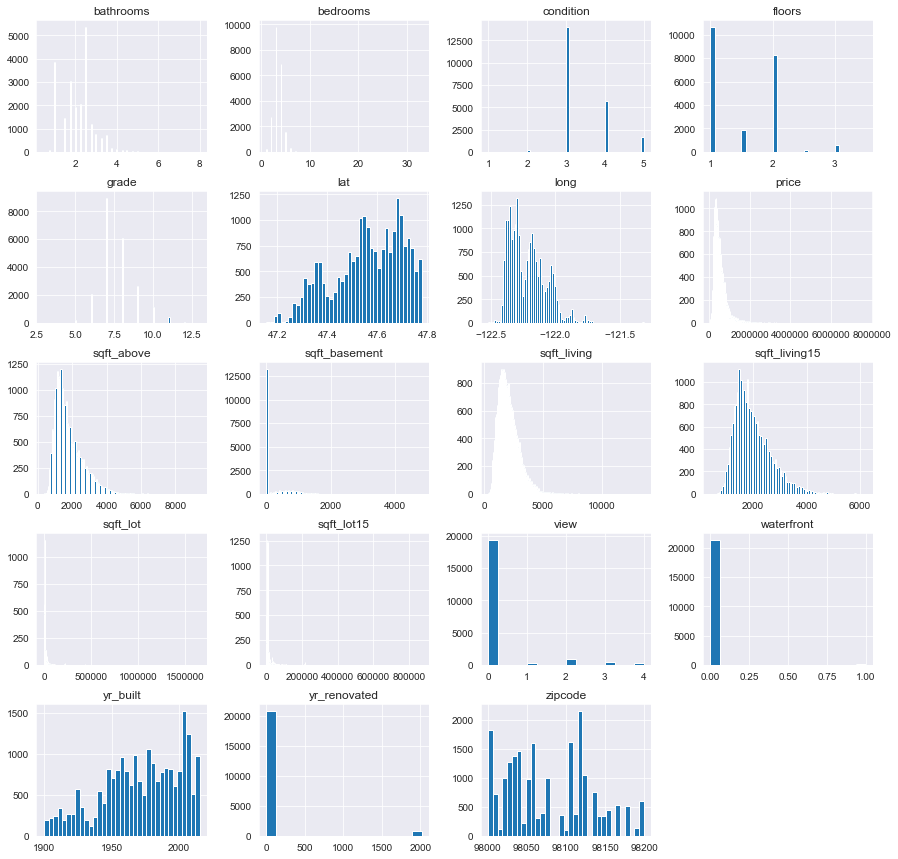

In [14]:
#Plot histograms of our x variables
df.hist(figsize=(15,15), bins = 'auto');

In [15]:
#TURNING COLUMNS TO STRING FOR HOT ENCODING
categories = ['Sub_Region','waterfront']
for cat in categories:
    df[cat] = df[cat].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
Sub_Region       21597 non-null object
dtypes: datetime64[ns](1), float64(6), int64(12), object(2)
memory usa

In [16]:
#HOT ENCODING
dummies = pd.get_dummies(df[categories],prefix = categories,drop_first = True)
df_preprocessed = df.drop(categories,axis = 1)
df_preprocessed = pd.concat([df_preprocessed,dummies],axis = 1)
df_preprocessed

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21592 2014-05-21  360000.0         3       2.50         1530      1131   
21593 2015-02-23  400000.0         4       2.50         2310      5813   
21594 2014-06-23  402101.0         2       0.75         1020      1350   
21595 2015-01-16  400000.0         3       2.50         1600      2388   
21596 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  view  condition  grade  ...  Sub_Region_East Urban  \
0         1.0   0.0          3      7  ...                      0   
1         2.0   0.0          3      7  ...                      0   
2         1.0   0.0          3      6  ...                      0   
3         1.0   0.0          5      7  ...                      0   
4         1.0   0.0          3      8  ...                      1   
...       ...   ...        ...    ...  ...                    ...   
21592     3.0   0.0          3      8  ...                      0   
21593     2.0   0.0          3      8  ...                      0   
21594     2.0   0.0          3      7  ...                      0   
21595     2.0   0.0          3      8  ...                      1   
21596     2.0   0.0          3      7  ...                      0   

       Sub_Region_North  Sub_Region_North & Seattle  Sub_Region_Seattle  \
0                     0                           0                   0   
1                     0                           0                   1   
2                     1                           0                   0   
3                     0                           0                   1   
4                     0                           0                   0   
...                 ...                         ...                 ...   
21592                 0                           0                   1   
21593                 0                           0                   0   
21594                 0                           0                   1   
21595                 0                           0                   0   
21596                 0                           0                   1   

       Sub_Region_South Rural  Sub_Region_South Urban  \
0                           0                       1   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
21592                       0                       0   
21593                       0                       0   
21594                       0                       0   
21595                       0                       0   
21596                       0                       0   

       Sub_Region_South and Seattle  Sub_Region_Vashon Island  Sub_Region_nan  \
0                                 0                         0               0   
1                                 0                         0               0   
2                                 0                         0               0   
3                                 0                         0               0   
4                                 0                         0               0   
...                             ...                       ...             ...   
21592                             0                         0               0   
21593                             1                         

In [17]:
#REMOVING EXTREME OUTLIERS
outliers_list = ['bedrooms','sqft_basement','sqft_above','sqft_living','sqft_lot','sqft_lot15','price']
for i in outliers_list:
    orig_tot = len(df_preprocessed)
    df_preprocessed = df_preprocessed[df_preprocessed[i] <= df_preprocessed[i].quantile(q=0.90)] # Subsetting to remove extreme outliers
    print('Percent removed:', (orig_tot -len(df_preprocessed))/orig_tot)

Percent removed: 0.08959577719127657
Percent removed: 0.09815888515919031
Percent removed: 0.09903000225580871
Percent removed: 0.1000250375563345
Percent removed: 0.10001391014049242
Percent removed: 0.0999227202472952
Percent removed: 0.100025757705847


In [18]:
outliers_list = ['bedrooms','sqft_basement','sqft_above','sqft_living','sqft_lot','sqft_lot15','price']
for i in outliers_list:
    orig_tot = len(df_preprocessed)
    df_preprocessed = df_preprocessed[df_preprocessed[i] >= df_preprocessed[i].quantile(q=0.10)] # Subsetting to remove extreme outliers
    print('Percent removed:', (orig_tot -len(df_preprocessed))/orig_tot)

Percent removed: 0.014405647777141766
Percent removed: 0.0
Percent removed: 0.09999032039492789
Percent removed: 0.09711765971176597
Percent removed: 0.09994044073853484
Percent removed: 0.09992059290629964
Percent removed: 0.09719158947213645


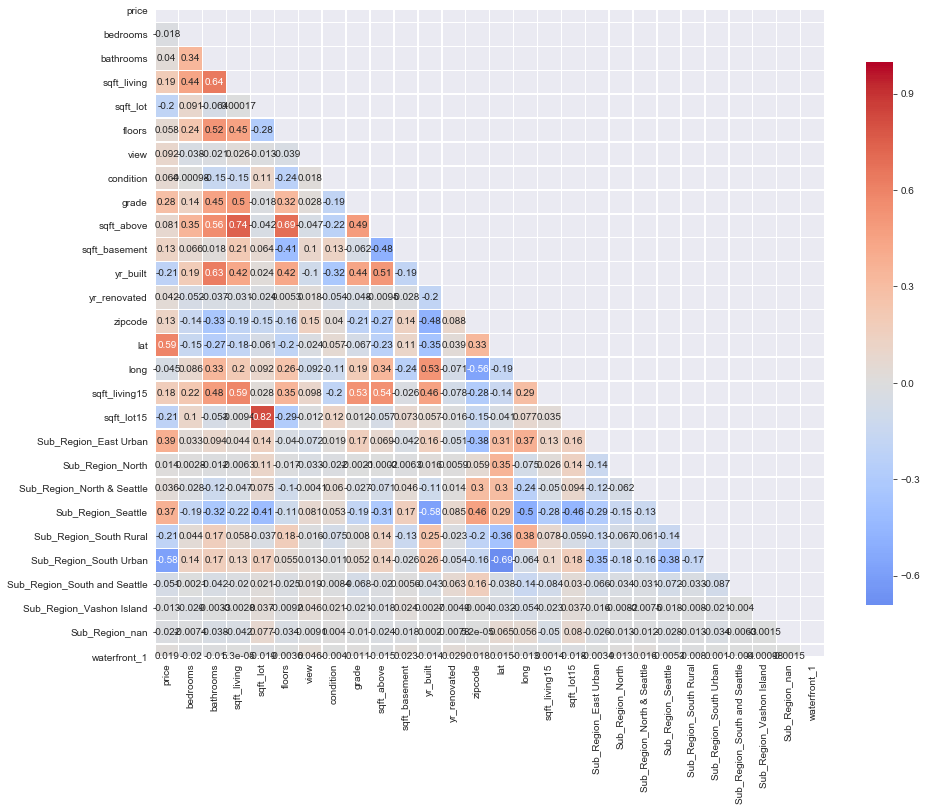

In [19]:
#CORRELATION HEATMAP
corr = df_preprocessed.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [20]:
#2) set view nulls to 0, assumption: nulls mean nobody has viewed
df_preprocessed['view'] = df_preprocessed['view'].fillna(0)

In [21]:
#DROPPING COLUMNS WITH HIGH CORRELATION
df_preprocessed.drop('sqft_above',axis = 1,inplace=True)
df_preprocessed.drop('yr_built',axis = 1,inplace=True)
df_preprocessed.drop('sqft_lot15',axis = 1,inplace=True)
df_preprocessed.drop('Sub_Region_nan',axis = 1,inplace=True)
df_preprocessed.drop('Sub_Region_Vashon Island',axis = 1,inplace=True)

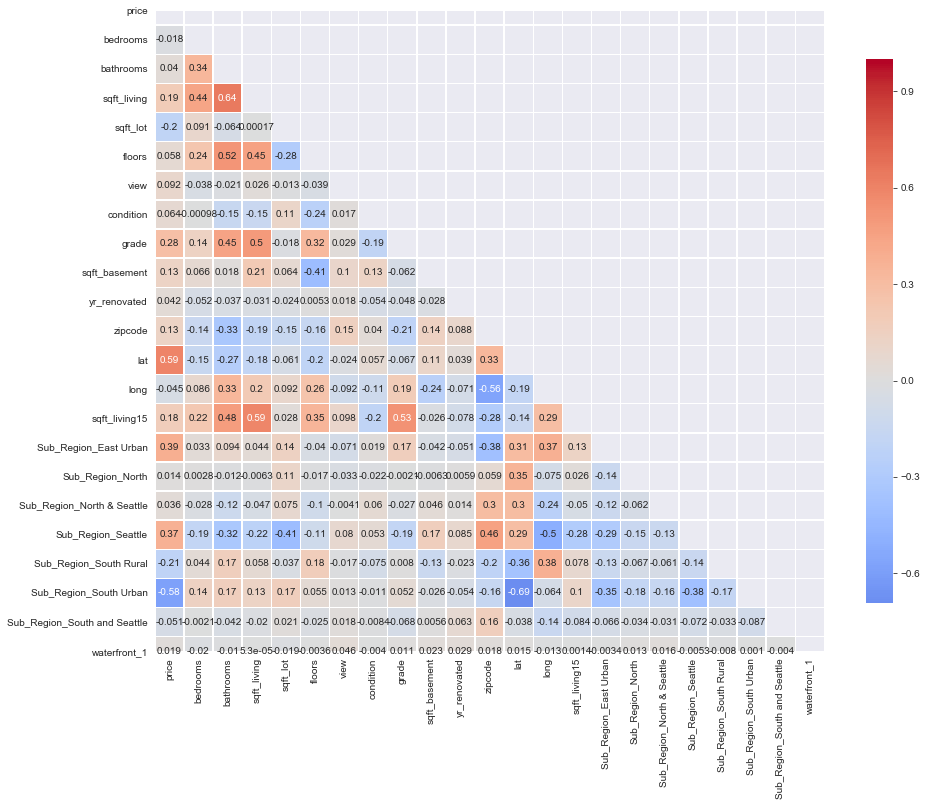

In [22]:
#CORRELATION HEATMAP
corr = df_preprocessed.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

In [23]:
df_preprocessed['log_price'] = df_preprocessed['price'].map(lambda x :np.log(x))
df_preprocessed

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
4     2015-02-18  510000.0         3       2.00         1680      8080   
6     2014-06-27  257500.0         3       2.25         1715      6819   
9     2015-03-12  323000.0         3       2.50         1890      6560   
17    2014-05-29  485000.0         4       1.00         1600      4300   
19    2015-04-24  230000.0         3       1.00         1250      9774   
...          ...       ...       ...        ...          ...       ...   
21549 2015-02-26  341780.0         4       2.75         2260      4440   
21561 2015-01-23  579000.0         4       3.25         1900      2631   
21569 2014-08-28  270000.0         3       2.50         1870      5000   
21587 2014-08-25  507250.0         3       2.50         2270      5536   
21593 2015-02-23  400000.0         4       2.50         2310      5813   

       floors  view  condition  grade  ...  sqft_living15  \
4         1.0   0.0          3      8  ...           1800   
6         2.0   0.0          3      7  ...           2238   
9         2.0   0.0          3      7  ...           2390   
17        1.5   0.0          4      7  ...           1610   
19        1.0   0.0          4      7  ...           1280   
...       ...   ...        ...    ...  ...            ...   
21549     2.0   0.0          3      7  ...           2260   
21561     2.0   0.0          3      9  ...           1710   
21569     2.0   0.0          3      7  ...           2170   
21587     2.0   0.0          3      8  ...           2270   
21593     2.0   0.0          3      8  ...           1830   

       Sub_Region_East Urban  Sub_Region_North  Sub_Region_North & Seattle  \
4                          1                 0                           0   
6                          0                 0                           0   
9                          0                 0                           0   
17                         0                 0                           0   
19                         0                 0                           0   
...                      ...               ...                         ...   
21549                      0                 0                           0   
21561                      0                 0                           0   
21569                      0                 0                           0   
21587                      0                 0                           0   
21593                      0                 0                           0   

       Sub_Region_Seattle  Sub_Region_South Rural  Sub_Region_South Urban  \
4                       0                       0                       0   
6                       0                       0                       1   
9                       0                       1                       0   
17                      1                       0                       0   
19                      0                       0                       1   
...                   ...                     ...                     ...   
21549                   0                       0                       1   
21561                   1                       0                       0   
21569                   0                       0                       1   
21587                   0                       0                       0   
21593                   0                       0                       0   

       Sub_Region_South and Seattle  waterfront_1  log_price  
4                                 0             0  13.142166  
6                                 0             0  12.458775  
9                                 0             0  12.685408  
17                                0             0  13.091904  
19                                0             0  12.345835  
...                             ...           ...        ...  
21549                             0             0  12.741923  
21561                   

In [24]:
YVar = df_preprocessed['log_price']
XVar = df_preprocessed.drop(['date', 'price','log_price'], axis = 1)



In [25]:
XVar2 = sm.add_constant(XVar)

In [26]:
linearModel2 = sm.OLS(YVar, XVar2).fit()
linearModel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     698.5
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:26:52   Log-Likelihood:                 2876.5
No. Observations:                6140   AIC:                            -5707.
Df Residuals:                    6117   BIC:                            -5552.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -29.4080      5.726     -5.136      0.000     -40.633     -18.183
bedrooms                        -0.0071      0.004     -1.908      0.056      -0.014       0.000
bathrooms                        0.0030      0.005      0.585      0.558      -0.007       0.013
sqft_living                      0.0002   9.31e-06     16.854      0.000       0.000       0.000
sqft_lot                     -5.993e-06   1.05e-06     -5.683      0.000   -8.06e-06   -3.93e-06
floors                           0.0157      0.007      2.401      0.016       0.003       0.028
view                             0.0452      0.005      8.984      0.000       0.035       0.055
condition                        0.0488      0.003     15.174      0.000       0.042       0.055
grade                            0.0824      0.004     21.015      0.000       0.075       0.090
sqft_basement                 -3.01e-06    9.6e-06     -0.314      0.754   -2.18e-05    1.58e-05
yr_renovated                  2.549e-05   6.39e-06      3.989      0.000     1.3e-05     3.8e-05
zipcode                          0.0002    5.2e-05      3.131      0.002    6.09e-05       0.000
lat                              0.7548      0.029     25.842      0.000       0.698       0.812
long                             0.0886      0.030      2.917      0.004       0.029       0.148
sqft_living15                 8.935e-05   7.03e-06     12.718      0.000    7.56e-05       0.000
Sub_Region_East Urban            0.1854      0.013     14.068      0.000       0.160       0.211
Sub_Region_North                -0.0432      0.017     -2.515      0.012      -0.077      -0.010
Sub_Region_North & Seattle       0.0066      0.019      0.344      0.731      -0.031       0.044
Sub_Region_Seattle               0.2362      0.017     13.798      0.000       0.203       0.270
Sub_Region_South Rural          -0.0344      0.015     -2.271      0.023      -0.064      -0.005
Sub_Region_South Urban          -0.0838      0.015     -5.424      0.000      -0.114      -0.054
Sub_Region_South and Seattle     0.0411      0.023      1.784      0.075      -0.004       0.086
waterfront_1                     0.0901      0.062      1.450      0.147      -0.032       0.212
==============================================================================
Omnibus:                      178.861   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              283.532
Skew:                          -0.277   Prob(JB):                     2.70e-62
Kurtosis:                       3.895   Cond. No.                     2.91e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is corre

In [37]:
YVar = df_preprocessed['price']
XVar3 = df_preprocessed.drop(['date', 'price','log_price','Sub_Region_South Rural','zipcode'], axis = 1)
XVar4 = sm.add_constant(XVar3)

In [38]:
linearModel4 = sm.OLS(YVar, XVar4).fit()
linearModel4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     666.1
Date:                Sun, 09 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:32:34   Log-Likelihood:                -76566.
No. Observations:                6140   AIC:                         1.532e+05
Df Residuals:                    6119   BIC:                         1.533e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -9.771e+06   1.63e+06     -6.009      0.000    -1.3e+07   -6.58e+06
bedrooms                     -3109.7883   1553.250     -2.002      0.045   -6154.704     -64.873
bathrooms                     -114.2927   2127.950     -0.054      0.957   -4285.823    4057.238
sqft_living                     60.0344      3.858     15.559      0.000      52.470      67.598
sqft_lot                        -2.2269      0.438     -5.083      0.000      -3.086      -1.368
floors                        6273.9977   2712.063      2.313      0.021     957.400    1.16e+04
view                          1.893e+04   2067.633      9.158      0.000    1.49e+04     2.3e+04
condition                     2.024e+04   1335.370     15.160      0.000    1.76e+04    2.29e+04
grade                         3.427e+04   1630.787     21.014      0.000    3.11e+04    3.75e+04
sqft_basement                    2.5174      3.993      0.630      0.528      -5.310      10.345
yr_renovated                    11.1083      2.656      4.182      0.000       5.901      16.316
lat                           2.908e+05   1.05e+04     27.793      0.000     2.7e+05    3.11e+05
long                          3.407e+04   1.21e+04      2.819      0.005    1.04e+04    5.78e+04
sqft_living15                   33.6365      2.913     11.548      0.000      27.927      39.346
Sub_Region_East Urban         8.354e+04   4358.890     19.166      0.000     7.5e+04    9.21e+04
Sub_Region_North             -1.067e+04   6484.049     -1.645      0.100   -2.34e+04    2042.705
Sub_Region_North & Seattle    1.146e+04   7249.345      1.581      0.114   -2750.131    2.57e+04
Sub_Region_Seattle             1.09e+05   5917.845     18.414      0.000    9.74e+04    1.21e+05
Sub_Region_South Urban       -1.846e+04   4177.822     -4.419      0.000   -2.67e+04   -1.03e+04
Sub_Region_South and Seattle  3.419e+04   8290.706      4.123      0.000    1.79e+04    5.04e+04
waterfront_1                  3.294e+04   2.59e+04      1.274      0.203   -1.78e+04    8.36e+04
==============================================================================
Omnibus:                       68.481   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.084
Skew:                           0.004   Prob(JB):                     2.28e-26
Kurtosis:                       3.679   Cond. No.                     1.59e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
linearModel4.params.sort_values()

const                          -9771428.65146
Sub_Region_South Urban           -18460.99722
Sub_Region_North                 -10668.31179
bedrooms                          -3109.78829
bathrooms                          -114.29270
sqft_lot                             -2.22688
sqft_basement                         2.51741
yr_renovated                         11.10828
sqft_living15                        33.63646
sqft_living                          60.03443
floors                             6273.99768
Sub_Region_North & Seattle        11461.13505
view                              18934.77420
condition                         20244.32949
waterfront_1                      32944.07906
long                              34070.01339
Sub_Region_South and Seattle      34185.76071
grade                             34270.13629
Sub_Region_East Urban             83543.31462
Sub_Region_Seattle               108973.34187
lat                              290810.70631
dtype: float64

In [43]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

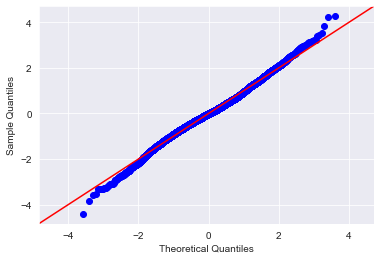

In [44]:
# Your code here - Check that the residuals are normally distributed
fig = sm.graphics.qqplot(linearModel4.resid, dist=stats.norm, line='45', fit=True)